This notebook reproduce the results reported in the paper submited to CIRP Annals.

### 1. Setup

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
pd.set_option('display.max_columns', 100)

In [3]:
import os
import sys
# Utiliser le répertoire courant du Jupyter Notebook
current_dir = os.getcwd()  # Obtenir le répertoire courant
root_dir = os.path.join(current_dir, "..")  # Aller un niveau en arrière

# Chemin vers le dossier afm
src_dir = os.path.join(root_dir, "afm")

# Ajouter src au sys.path
sys.path.append(src_dir)

from pca import PCA_fault_detection as acp
from utils import false_alarm_rate, fault_detection_rate, false_discovery_rate

### 2. Loading the data

In [4]:
fault_free_train = pd.read_csv(
    os.path.join(root_dir,"data/fault_free_training.csv")
)
fault_free_train

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,0.25038,3674.0,4529.0,9.2320,26.889,42.402,2704.3,74.863,120.41,0.33818,80.044,51.435,2632.9,25.029,50.528,3101.1,22.819,65.732,229.61,341.22,94.640,77.047,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.83570,0.098577,53.724,43.828,62.881,53.744,24.657,62.544,22.137,39.935,42.323,47.757,47.510,41.258,18.447
1,0,1,2,0.25109,3659.4,4556.6,9.4264,26.721,42.576,2705.0,75.000,120.41,0.33620,80.078,50.154,2633.8,24.419,48.772,3102.0,23.333,65.716,230.54,341.30,94.595,77.434,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.83570,0.098577,53.724,43.828,63.132,53.414,24.588,59.259,22.084,40.176,38.554,43.692,47.427,41.359,17.194
2,0,1,3,0.25038,3660.3,4477.8,9.4426,26.875,42.070,2706.2,74.771,120.42,0.33563,80.220,50.302,2635.5,25.244,50.071,3103.5,21.924,65.732,230.08,341.38,94.605,77.466,31.767,8.7694,26.095,6.8259,18.961,1.6292,32.985,13.742,23.897,1.3001,18.765,2.2602,4.8543,2.3900,0.017866,0.83570,0.098577,53.724,43.828,63.117,54.357,24.666,61.275,22.380,40.244,38.990,46.699,47.468,41.199,20.530
3,0,1,4,0.24977,3661.3,4512.1,9.4776,26.758,42.063,2707.2,75.224,120.39,0.33553,80.305,49.990,2635.6,23.268,50.435,3102.8,22.948,65.781,227.91,341.71,94.473,77.443,31.767,8.7694,26.095,6.8259,18.961,1.6292,32.985,13.742,23.897,1.3001,18.765,2.2602,4.8543,2.3900,0.017866,0.83570,0.098577,53.724,43.828,63.100,53.946,24.725,59.856,22.277,40.257,38.072,47.541,47.658,41.643,18.089
4,0,1,5,0.29405,3679.0,4497.0,9.3381,26.889,42.650,2705.1,75.388,120.39,0.32632,80.064,51.310,2632.4,26.099,50.480,3103.5,22.808,65.788,231.37,341.11,94.678,76.947,32.322,8.5821,26.769,6.8688,18.782,1.6396,33.071,13.834,24.228,1.0938,18.666,2.2193,4.8304,2.2416,0.017866,0.83570,0.098577,53.724,43.828,63.313,53.658,28.797,60.717,21.947,39.144,41.955,47.645,47.346,41.507,18.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0,500,496,0.29325,3640.1,4473.0,9.1949,26.867,42.379,2700.2,75.533,120.41,0.34050,80.146,48.628,2628.4,24.419,51.045,3097.9,22.738,65.759,233.04,338.69,94.723,77.098,31.792,8.9538,25.746,6.9870,19.035,1.6084,32.348,14.030,23.705,1.2103,18.837,2.2941,4.9035,2.2539,0.026900,0.85987,0.091175,54.058,43.844,63.443,53.429,29.249,60.773,21.532,40.451,34.064,48.953,48.291,40.812,18.756
249996,0,500,497,0.29134,3625.7,4506.2,9.2109,26.889,42.291,2700.6,75.935,120.39,0.35374,80.350,51.544,2628.5,25.637,51.954,3098.7,22.464,65.830,231.85,338.98,94.768,77.602,32.226,8.8243,25.993,6.8963,19.259,1.6478,32.801,13.766,24.300,1.2646,18.669,2.2836,4.8441,2.2832,0.026900,0.85987,0.091175,54.058,43.844,62.542,53.830,28.975,61.517,21.750,42.762,42.645,51.055,48.589,40.933,19.360
249997,0,500,498,0.29438,3600.2,4478.3,9.1957,26.820,42.448,2700.3,74.706,120.41,0.35910,80.445,50.567,2628.7,25.430,50.102,3100.4,22.465,65.928,233.28,338.79,94.728,77.493,32.226,8.8243,25.993,6.8963,19.259,1.6478,32.801,13.766,24.300,1.2646,18.669,2.2836,4.8441,2.2832,0.026900,0.85987,0.091175,54.058,43.844,62.979,54.163,28.676,61.656,21.487,42.109,39.770,46.770,48.648,41.465,19.344
249998,0,500,499,0.25269,3683.5,4486.4,9.2832,27.188,42.757,2697.4,75.101,120.39,0.32469,80.332,51.418,2625.7,24.280,48.742,3098.2,22.815,65.984,233.67,338.46,94.721,77.418,32.150,9.0061,26.029,6.8643,18.985,1.6749,32.314,13.841,24.322,1.4914,18.907,2.267

In [5]:
fault_free_test = pd.read_csv(
    os.path.join(root_dir,"data/fault_free_testing.csv")
)
fault_free_test

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,74.750,120.41,0.33642,80.185,50.671,2634.6,24.592,50.614,3102.5,24.119,65.764,231.94,341.27,94.660,77.137,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.83570,0.098577,53.724,43.828,62.908,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,0,1,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,75.126,120.38,0.33801,80.104,49.508,2634.1,23.399,49.353,3102.3,23.817,65.729,229.67,341.76,94.558,77.130,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.83570,0.098577,53.724,43.828,63.429,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,0,1,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,74.540,120.38,0.33702,79.988,51.280,2632.1,24.319,49.144,3100.7,21.973,65.708,229.94,341.47,94.732,77.168,32.492,8.9860,25.882,6.9881,18.750,1.6203,33.387,13.666,23.703,1.2234,18.834,2.2782,4.8584,2.3201,0.017866,0.83570,0.098577,53.724,43.828,63.412,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,0,1,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,74.861,120.38,0.33648,79.957,50.668,2632.3,24.209,50.654,3101.3,23.378,65.692,230.42,341.38,94.466,77.147,32.492,8.9860,25.882,6.9881,18.750,1.6203,33.387,13.666,23.703,1.2234,18.834,2.2782,4.8584,2.3201,0.017866,0.83570,0.098577,53.724,43.828,63.668,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,0,1,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,74.380,120.40,0.32114,80.261,50.066,2636.1,25.682,49.198,3102.2,22.692,65.723,229.42,341.53,94.770,77.868,32.396,8.9172,26.103,6.6982,18.333,1.6463,32.913,13.874,23.524,1.2179,18.527,2.2895,4.8113,2.2049,0.017866,0.83570,0.098577,53.724,43.828,62.213,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479995,0,500,956,0.26428,3671.5,4510.8,9.2852,27.141,42.297,2699.9,74.296,120.41,0.33822,80.353,49.535,2628.9,25.585,51.547,3097.8,22.643,66.486,249.99,341.56,94.494,77.239,32.328,8.6921,25.985,7.0899,18.827,1.6506,33.646,13.844,23.509,1.0825,18.787,2.2994,4.8223,2.3555,0.026771,0.85282,0.098058,53.863,43.666,64.082,53.942,26.022,61.709,22.417,40.510,36.731,50.115,52.721,40.927,18.854
479996,0,500,957,0.25132,3573.4,4483.9,9.2872,26.604,42.311,2698.1,74.629,120.40,0.33728,80.155,48.653,2626.6,24.854,50.510,3094.7,22.641,66.543,250.45,341.68,94.698,77.390,32.355,8.8373,26.515,6.8426,19.004,1.6293,33.515,13.815,23.419,1.1804,18.424,2.2789,4.8595,2.2484,0.026771,0.85282,0.098058,53.863,43.666,62.646,53.760,24.585,61.267,21.928,39.893,34.136,47.714,52.908,41.412,18.847
479997,0,500,958,0.25105,3622.6,4433.3,9.3998,26.707,41.936,2699.5,75.484,120.38,0.33560,80.131,49.145,2628.4,23.213,50.738,3095.1,23.518,66.534,250.88,341.81,94.822,77.171,32.355,8.8373,26.515,6.8426,19.004,1.6293,33.515,13.815,23.419,1.1804,18.424,2.2789,4.8595,2.2484,0.026771,0.85282,0.098058,53.863,43.666,61.800,54.366,24.613,61.745,22.212,40.098,35.585,48.241,53.099,40.150,16.791
479998,0,500,959,0.24521,3660.5,4485.2,9.3885,26.936,42.639,2700.5,74.614,120.39,0.33390,80.080,49.154,2629.0,25.003,49.983,3096.6,23.382,66.524,252.79,341.95,94.722,77.451,32.592,8.8641,26.346,6.9779,18.282,1.6286,33.441,13.667,23.340,1.3458,18.825,2.313

In [7]:
faulty_test = pd.read_csv(
    os.path.join(root_dir,"data/faulty_testing.csv")
)
faulty_test

,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,xmeas_8,xmeas_9,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,xmeas_17,xmeas_18,xmeas_19,xmeas_20,xmeas_21,xmeas_22,xmeas_23,xmeas_24,xmeas_25,xmeas_26,xmeas_27,xmeas_28,xmeas_29,xmeas_30,xmeas_31,xmeas_32,xmeas_33,xmeas_34,xmeas_35,xmeas_36,xmeas_37,xmeas_38,xmeas_39,xmeas_40,xmeas_41,xmv_1,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,1,1,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,74.750,120.41,0.33642,80.185,50.671,2634.6,24.592,50.614,3102.5,24.119,65.764,231.94,341.27,94.660,77.137,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.83570,0.098577,53.724,43.828,62.908,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,1,1,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,75.126,120.38,0.33801,80.104,49.508,2634.1,23.399,49.353,3102.3,23.817,65.729,229.67,341.76,94.558,77.130,32.188,8.8933,26.383,6.8820,18.776,1.6567,32.958,13.823,23.978,1.2565,18.579,2.2633,4.8436,2.2986,0.017866,0.83570,0.098577,53.724,43.828,63.429,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,1,1,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,74.540,120.38,0.33702,79.988,51.280,2632.1,24.319,49.144,3100.7,21.973,65.708,229.94,341.47,94.732,77.168,32.492,8.9860,25.882,6.9881,18.750,1.6203,33.387,13.666,23.703,1.2234,18.834,2.2782,4.8584,2.3201,0.017866,0.83570,0.098577,53.724,43.828,63.412,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,1,1,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,74.861,120.38,0.33648,79.957,50.668,2632.3,24.209,50.654,3101.3,23.378,65.692,230.42,341.38,94.466,77.147,32.492,8.9860,25.882,6.9881,18.750,1.6203,33.387,13.666,23.703,1.2234,18.834,2.2782,4.8584,2.3201,0.017866,0.83570,0.098577,53.724,43.828,63.668,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,1,1,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,74.380,120.40,0.32114,80.261,50.066,2636.1,25.682,49.198,3102.2,22.692,65.723,229.42,341.53,94.770,77.868,32.396,8.9172,26.103,6.6982,18.333,1.6463,32.913,13.874,23.524,1.2179,18.527,2.2895,4.8113,2.2049,0.017866,0.83570,0.098577,53.724,43.828,62.213,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599995,20,500,956,0.26494,3719.6,4536.7,9.2265,26.875,42.401,2708.3,75.408,120.40,0.31196,79.698,48.988,2630.8,24.632,49.552,3108.4,24.015,64.709,213.37,338.09,94.592,76.838,32.090,8.8622,26.504,6.7403,18.968,1.6853,32.253,13.906,24.741,1.2128,18.209,2.2578,4.8537,2.3312,0.005927,0.86515,0.121320,54.086,44.150,63.375,54.382,26.018,62.068,20.708,37.589,35.121,45.496,42.653,40.816,15.846
9599996,20,500,957,0.25252,3724.0,4494.3,9.1873,27.221,41.999,2706.0,74.880,120.43,0.33990,79.740,50.099,2627.8,26.879,48.775,3106.5,22.903,64.725,214.33,337.55,94.586,76.918,31.728,8.8455,26.574,6.9132,18.830,1.6628,32.700,13.793,24.456,1.2055,18.410,2.2281,4.7304,2.2030,0.005927,0.86515,0.121320,54.086,44.150,63.215,54.236,25.098,61.557,20.655,40.934,38.391,43.699,42.832,41.853,18.486
9599997,20,500,958,0.25164,3700.8,4537.3,9.2514,26.659,42.180,2704.7,75.070,120.41,0.34186,79.847,49.273,2626.7,24.154,49.615,3104.1,23.047,64.787,213.70,337.20,94.522,77.128,31.728,8.8455,26.574,6.9132,18.830,1.6628,32.700,13.793,24.456,1.2055,18.410,2.2281,4.7304,2.2030,0.005927,0.86515,0.121320,54.086,44.150,63.615,53.722,25.185,61.169,20.650,40.694,35.961,45.643,43.147,40.538,18.127
9599998,20,500,959,0.29097,3641.8,4525.2,9.3053,26.823,42.234,2705.0,75.727,120.41,0.32497,80.008,50.580,2624.8,24.288,49.764,3105.7,23.391,64.875,214.65,336.46,94.769,77.070,32.045,9.0099,26.555,6.9274,19.361,1.5909,32.284,13.822,24.463,1.1300,18.7

### 3. Training the detection model

In [8]:
variables = fault_free_train.columns
sensors = variables[3:]
len(sensors)

52

In [9]:
X_train = fault_free_train[sensors]
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

In [13]:
model_pa = PCA(X_train_sc.shape[1]-1)
transformedData = model_pa.fit_transform(X_train_sc)

In [10]:
random_eigenvalues = np.zeros(X_train_sc.shape[1]-1)
for i in tqdm(range(100)):
    random_data = pd.DataFrame(np.random.normal(0, 1, [X_train_sc.shape[1]-1, X_train_sc.shape[0]]))
    pca_random = PCA(X_train_sc.shape[1]-1)
    pca_random.fit(random_data)
    transformedRandomData = pca_random.transform(random_data)
    random_eigenvalues = random_eigenvalues+pca_random.explained_variance_ratio_
random_eigenvalues = random_eigenvalues / 100

100%|██████████| 100/100 [09:46<00:00,  5.87s/it]


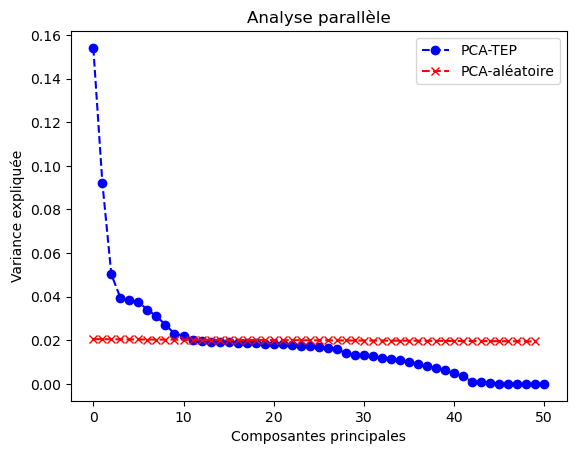

In [15]:
plt.plot(model_pa.explained_variance_ratio_, '--bo', label='PCA-TEP')
plt.plot(random_eigenvalues[:-1], '--rx', label='PCA-aléatoire')
plt.xlabel('Composantes principales')
plt.ylabel('Variance expliquée')
plt.legend()
plt.title('Analyse parallèle')
plt.show()